######                                                               "JAIHANUMANJI"

## Statistical and Machine Learning Approaches 

### Individual Project 


### Submitted By: Aazad Ghoslya

In [99]:
# Import the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

### 1. Data

#### 1.1 Import the data

In [100]:
card_data = pd.read_csv(r"C:\Users\aghoslya\Desktop\Statistical Learning using R\Individual Project\Dataset 2_Credit Card Default\credit_default_train.csv")

#### 1.2 Exploring the Data

In [101]:
# Top 5 values in the data
card_data.head(5)

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


In [102]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cust_id                     20000 non-null  int64  
 1   LIMIT_BAL                   19798 non-null  float64
 2   SEX                         19839 non-null  float64
 3   EDUCATION                   19801 non-null  float64
 4   MARRIAGE                    19830 non-null  float64
 5   AGE                         19786 non-null  float64
 6   PAY_0                       19805 non-null  float64
 7   PAY_2                       19781 non-null  float64
 8   PAY_3                       19783 non-null  float64
 9   PAY_4                       19801 non-null  float64
 10  PAY_5                       19815 non-null  float64
 11  PAY_6                       19797 non-null  float64
 12  BILL_AMT1                   19815 non-null  float64
 13  BILL_AMT2                   197

In [103]:
# Total number of rows and columns
card_data.shape

(20000, 25)

In [104]:
# Getting the statistics for every column
card_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cust_id,20000.0,15008.050800,8679.933160,2.0,7471.25,15003.0,22532.5,30000.0
LIMIT_BAL,19798.0,166701.872916,129493.677795,10000.0,50000.00,140000.0,240000.0,1000000.0
SEX,19839.0,1.604063,0.489063,1.0,1.00,2.0,2.0,2.0
EDUCATION,19801.0,1.851927,0.789254,0.0,1.00,2.0,2.0,6.0
MARRIAGE,19830.0,1.555371,0.521595,0.0,1.00,2.0,2.0,3.0
AGE,19786.0,35.476347,9.233460,21.0,28.00,34.0,41.0,75.0
PAY_0,19805.0,-0.020096,1.115072,-2.0,-1.00,0.0,0.0,8.0
PAY_2,19781.0,-0.130681,1.196540,-2.0,-1.00,0.0,0.0,8.0
PAY_3,19783.0,-0.166153,1.200058,-2.0,-1.00,0.0,0.0,8.0
PAY_4,19801.0,-0.222666,1.171144,-2.0,-1.00,0.0,0.0,8.0


#### 1.3 Checking the null values

In [105]:
# Checking for the null values
card_data.isna().sum()

cust_id                         0
LIMIT_BAL                     202
SEX                           161
EDUCATION                     199
MARRIAGE                      170
AGE                           214
PAY_0                         195
PAY_2                         219
PAY_3                         217
PAY_4                         199
PAY_5                         185
PAY_6                         203
BILL_AMT1                     185
BILL_AMT2                     209
BILL_AMT3                     175
BILL_AMT4                     165
BILL_AMT5                     181
BILL_AMT6                     197
PAY_AMT1                      204
PAY_AMT2                      184
PAY_AMT3                      212
PAY_AMT4                      197
PAY_AMT5                      179
PAY_AMT6                      196
default.payment.next.month      0
dtype: int64

In [106]:
# Renaming the column pay_0 to pay_1
card_data = card_data.rename(columns={"PAY_0": "PAY_1"})

## 2. Data Analysis 

In [107]:
card_data

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,1.0,2.0,2.0,36.0,1.0,-2.0,-1.0,0.0,...,116089.0,114293.0,118081.0,9125.0,126768.0,NaN,4050.0,15099.0,5015.0,0
19996,25043,30000.0,1.0,3.0,2.0,31.0,0.0,0.0,0.0,0.0,...,28075.0,29682.0,28001.0,2000.0,2000.0,2000.0,2014.0,2000.0,2000.0,0
19997,14281,20000.0,1.0,2.0,2.0,30.0,1.0,2.0,4.0,3.0,...,19860.0,19690.0,1735.0,2000.0,0.0,0.0,0.0,500.0,0.0,1
19998,28693,240000.0,1.0,2.0,2.0,67.0,0.0,0.0,0.0,0.0,...,468202.0,442401.0,419209.0,20225.0,17389.0,80167.0,15167.0,16000.0,13133.0,0


##### Age Distribution

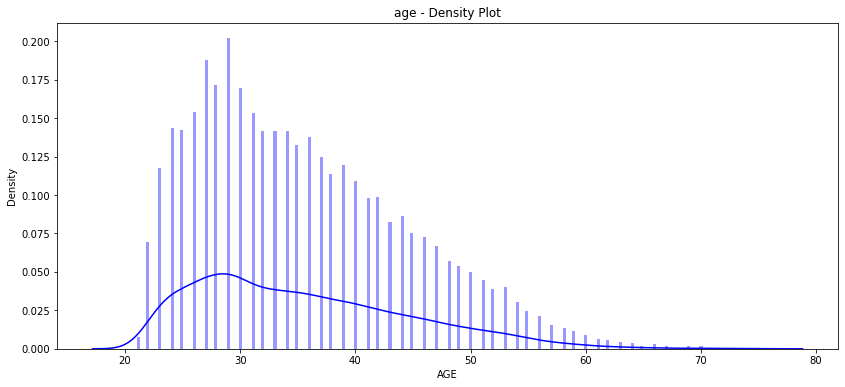

In [108]:
plt.figure(figsize = (14,6))
plt.title('age - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(card_data["AGE"],kde=True,bins=200, color="blue")
plt.show()

##### Marraige

In [109]:
# Unique values in Marriage
card_data['MARRIAGE'].unique()

array([ 2.,  1.,  3., nan,  0.])

Text(0.5, 1.0, 'MARRIAGE Distribution')

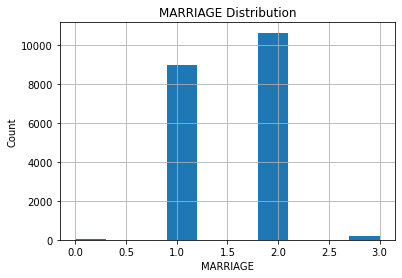

In [110]:
# Checking for the MARRIAGE distribution for card holders 
card_data['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('Count')
plt.title('MARRIAGE Distribution')

##### Education

In [111]:
# Unique values in EDUCATION
card_data['EDUCATION'].unique()

array([ 3.,  2.,  1., nan,  5.,  4.,  6.,  0.])

Text(0.5, 1.0, 'Education Distribution')

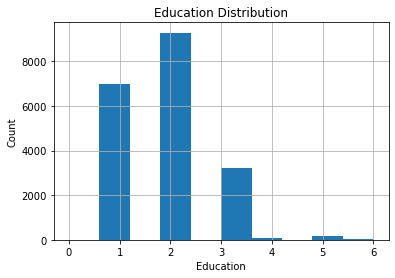

In [112]:
# Checking for the education distribution for card holders 
card_data['EDUCATION'].hist()
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')

##### Gender 


In [113]:
# Unique values in SEX
card_data['SEX'].unique()

array([ 1.,  2., nan])

Text(0.5, 1.0, 'Gender Distribution')

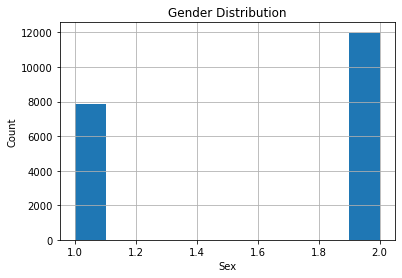

In [114]:
# Checking for the sex ratio for card holders 
card_data['SEX'].hist()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')

##### Defaulters 

In [115]:
# Renaming the column
card_data = card_data.rename(columns={"default.payment.next.month": "default"})

In [116]:
# Number of classes in default payment method
card_data['default'].value_counts()

0    15586
1     4414
Name: default, dtype: int64

In [117]:
# Percentage wise distribution
print(card_data['default'].value_counts(normalize=True))

0    0.7793
1    0.2207
Name: default, dtype: float64


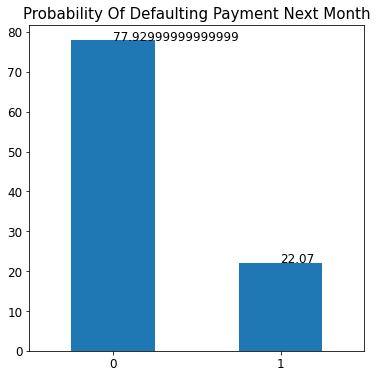

In [118]:
# Plotting the default payments

def_cnt = (card_data.default.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

##### Defaulter sex wise

<AxesSubplot:xlabel='SEX', ylabel='count'>

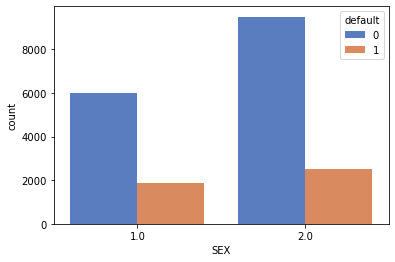

In [119]:
sns.countplot(x='SEX', data=card_data,hue="default", palette="muted")  

##### Marraige and defaulter

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

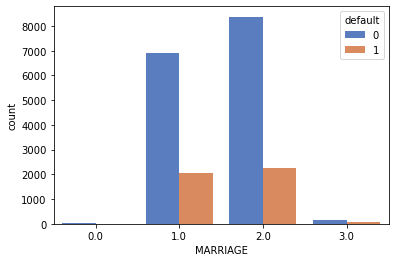

In [120]:
sns.countplot(x="MARRIAGE", data=card_data,hue="default", palette="muted")

##### Education and Defaulter

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

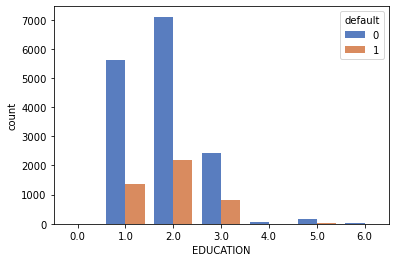

In [121]:
sns.countplot(x="EDUCATION", data=card_data,hue="default", palette="muted")

##### Bill Amount

In [122]:
pay_s = card_data[['BILL_AMT6','BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']]
card_data['BILL_AMT6'].value_counts().index.to_list().sort()

fig = make_subplots(rows= 2, cols=3,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= card_data["BILL_AMT6"]),row = 1, col = 3)
fig.add_trace(go.Histogram(x= card_data["BILL_AMT5"]),row = 1, col = 2)
fig.add_trace(go.Histogram(x= card_data["BILL_AMT4"]),row = 1, col = 1)
fig.add_trace(go.Histogram(x= card_data["BILL_AMT3"]),row = 2, col = 3)
fig.add_trace(go.Histogram(x= card_data["BILL_AMT2"]),row = 2, col = 2)
fig.add_trace(go.Histogram(x= card_data["BILL_AMT1"]),row = 2, col = 1)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Plots for Bill Amounts",showlegend=False)
fig.show()

### Pay

In [123]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

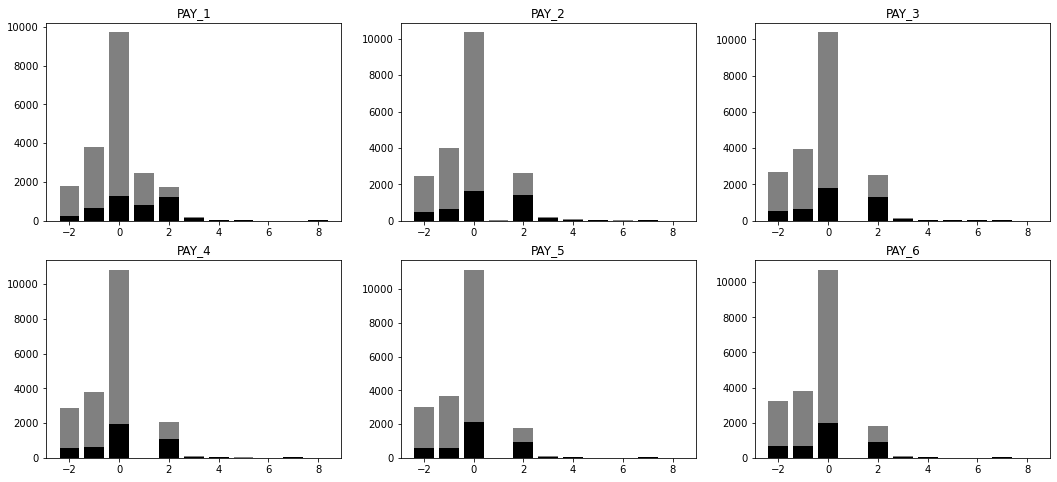

In [124]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = card_data[pay_status_columns[i]].value_counts()
    x = card_data[pay_status_columns[i]][(card_data['default']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='grey')
    ax[row,col].bar(x.index, x, align='center', color='black', alpha=1.0)
    ax[row,col].set_title(pay_status_columns[i])

plt.show()

##### Payment Status

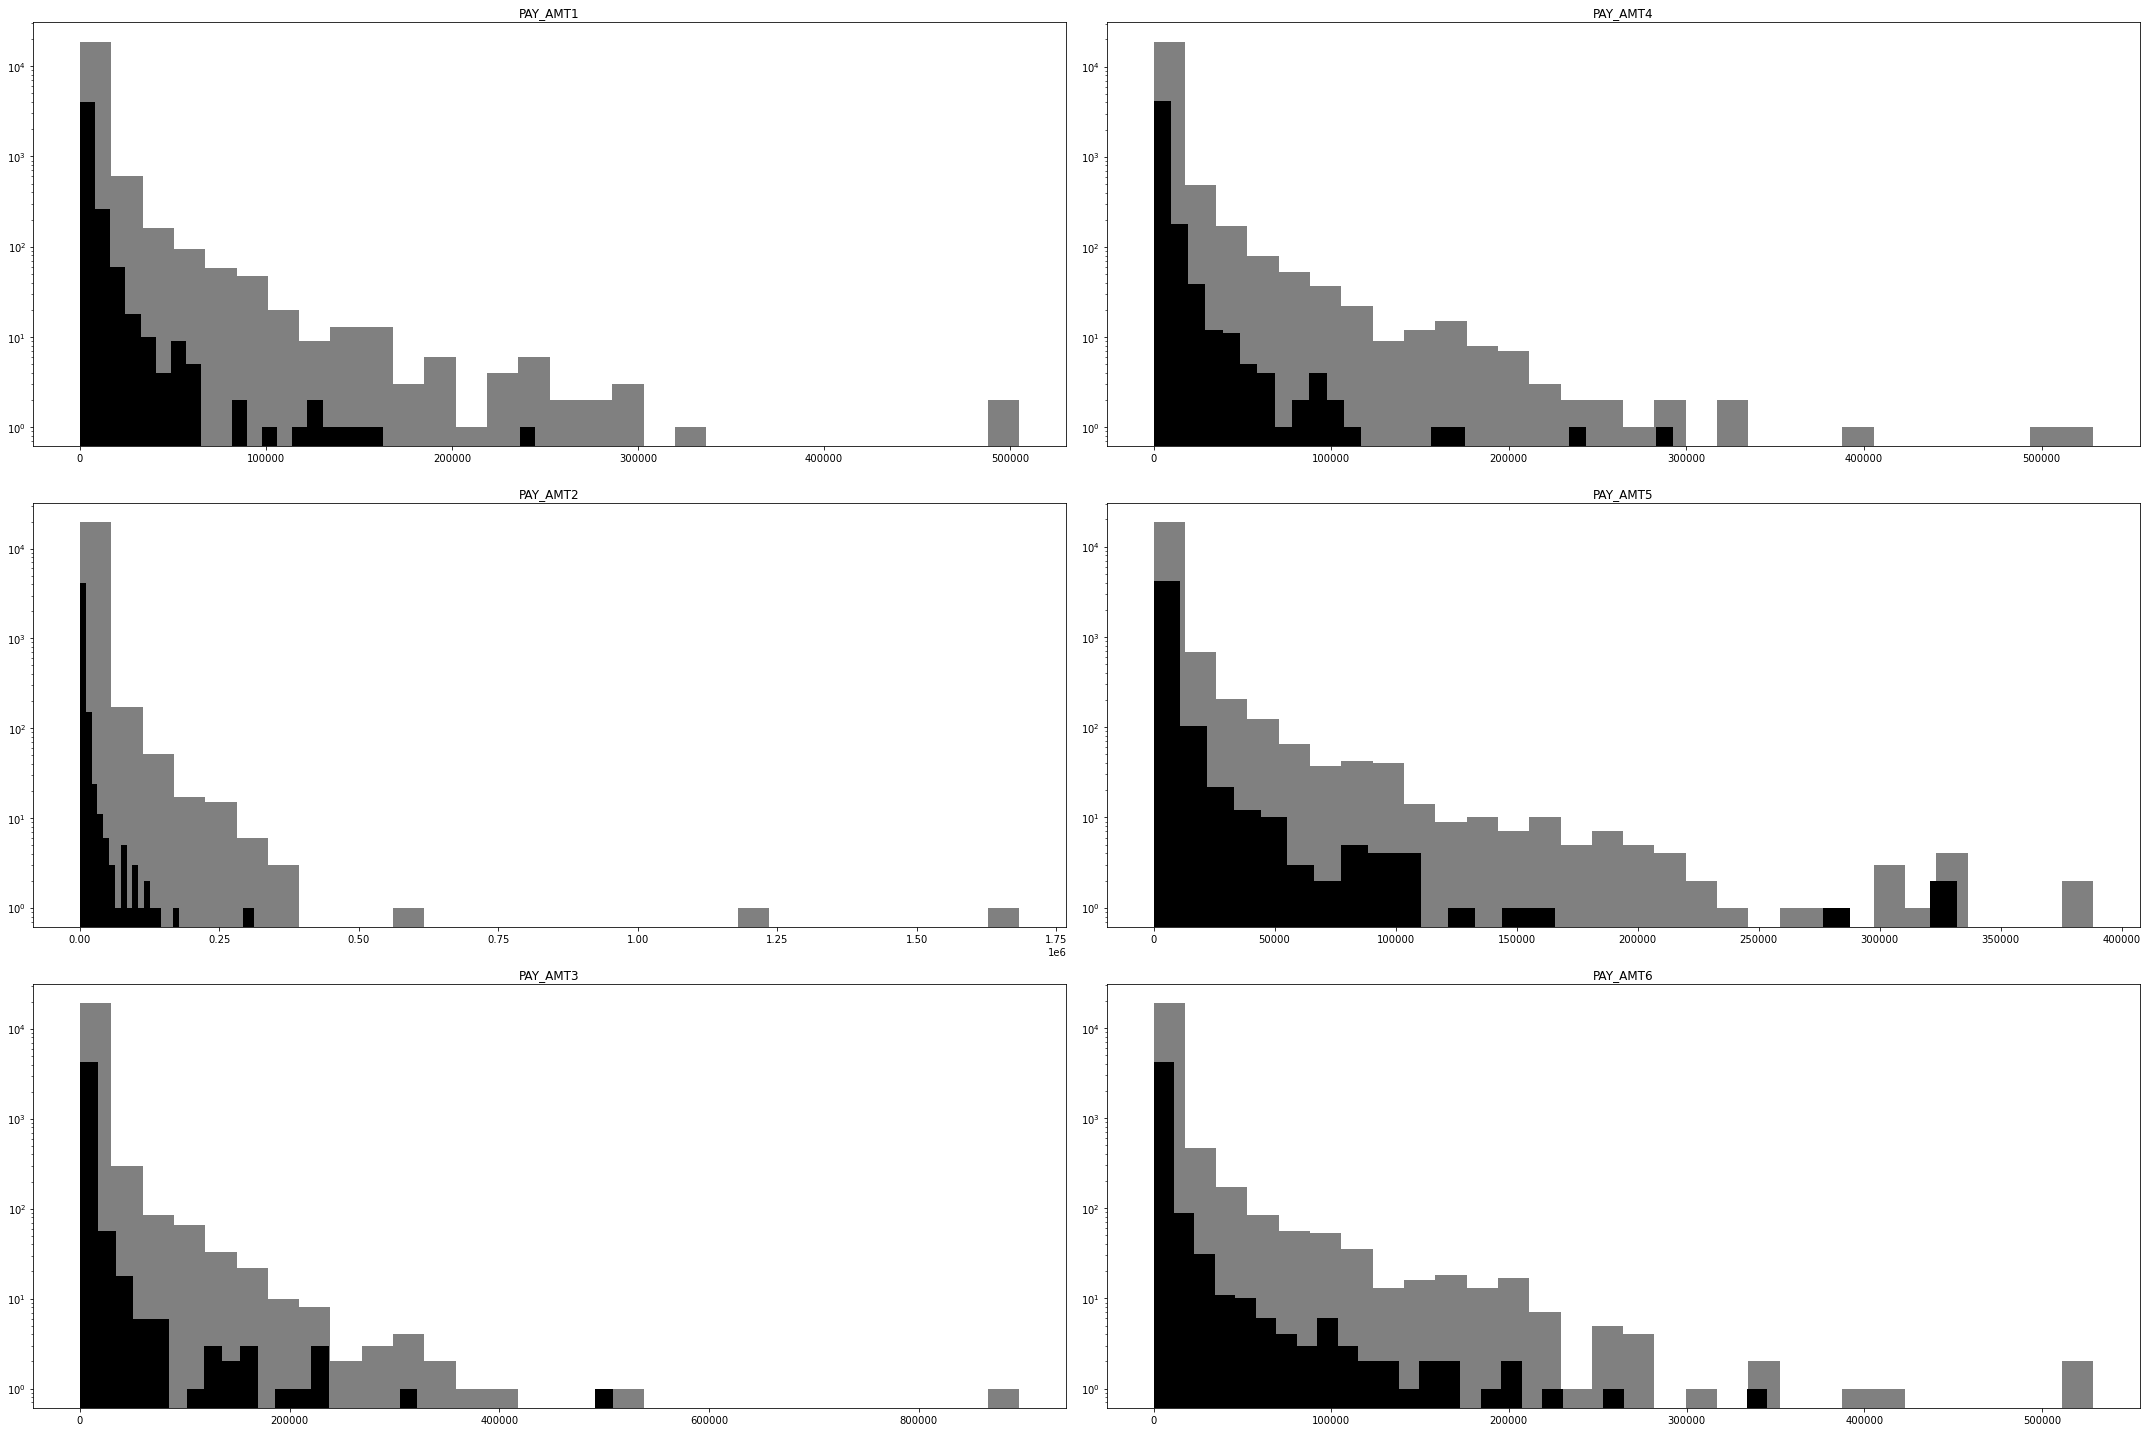

In [125]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(30,20)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(card_data[pay_amt_columns[i]], 30, color ='grey')
    ax[row,col].hist(card_data[pay_amt_columns[i]][(card_data['default']==1)],30,color='black',alpha = 1.0)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

### Correlation Matrix

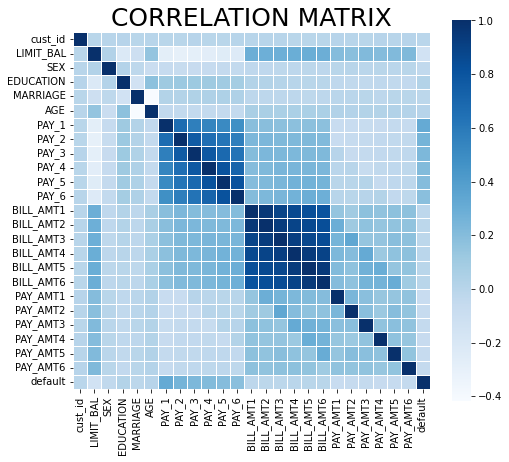

In [126]:
# Features correlation
corr = card_data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="Blues" , linewidths=1.0, ax=ax)
plt.title('CORRELATION MATRIX', size=25);

### 3. Data Preprocessing
- Checking for the null values and replacing the unrelated values

In [127]:
card_data.loc[card_data.MARRIAGE == 0, 'MARRIAGE'] = 3
card_data.MARRIAGE.value_counts()

2.0    10623
1.0     8958
3.0      249
Name: MARRIAGE, dtype: int64

#### Seprating different types of features

####  Numerical Variables

In [128]:
pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
paid = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
time_series = bill + paid + ['LIMIT_BAL']

In [129]:
numerical_vars = ['LIMIT_BAL',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#### Categorical Variables

In [130]:
# Categorical Variables
categorical_vars = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

### Features

<AxesSubplot:>

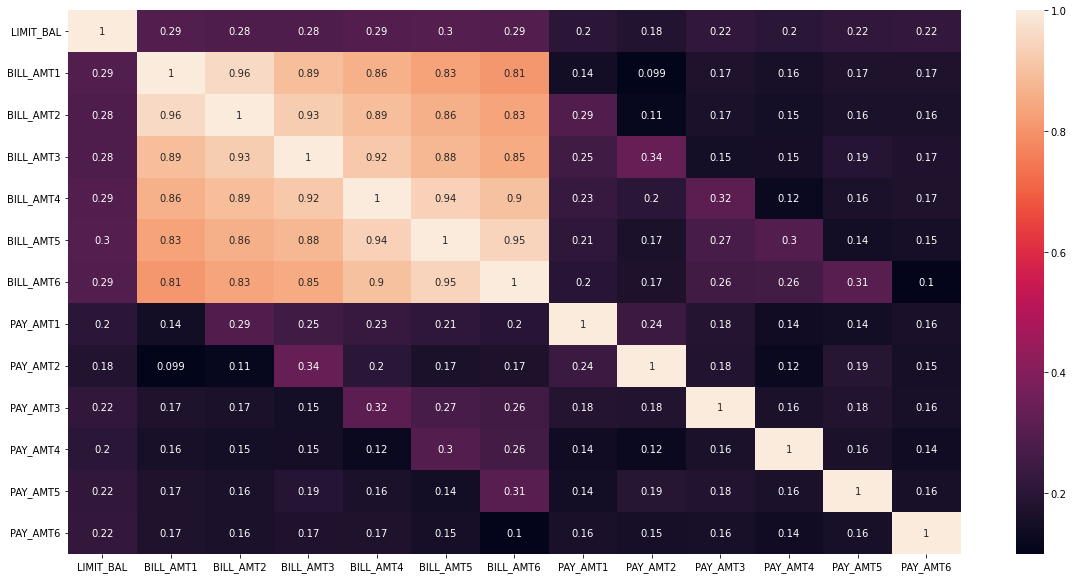

In [131]:
# correlation matrix for numerical features
plt.figure(figsize=(20,10))
sns.heatmap(card_data[numerical_vars].corr(method='pearson'),annot=True)

<AxesSubplot:>

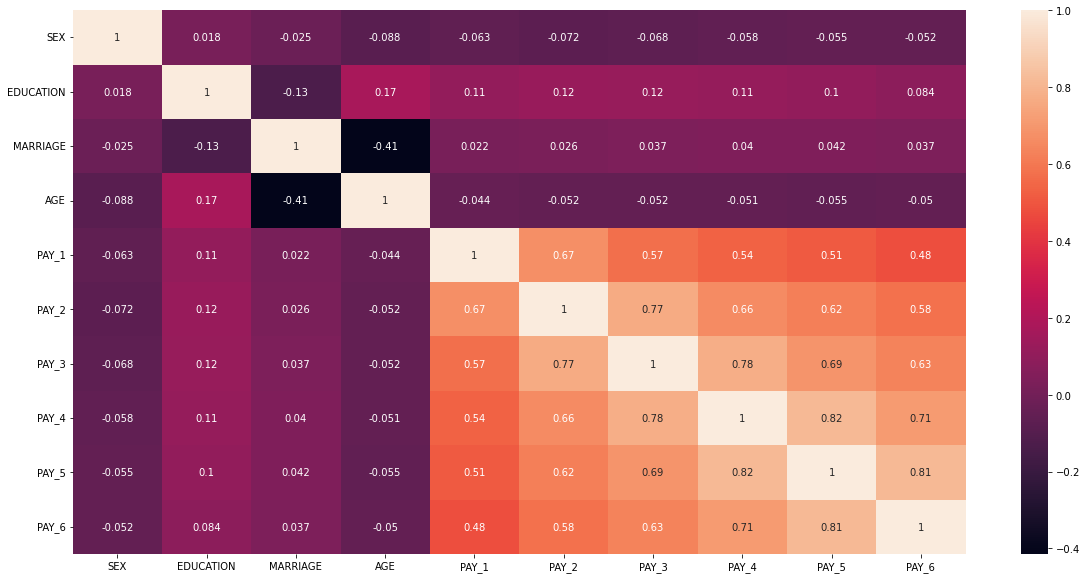

In [132]:
# correlation matrix for categorical features
plt.figure(figsize=(20,10))
sns.heatmap(card_data[categorical_vars].corr(method='pearson'),annot=True)

#### Handling the NA values

##### Categorical Values

In [133]:
# Replacing the categorical variables with the mode values 
card_data[categorical_vars] = card_data[categorical_vars].fillna(card_data[categorical_vars].mode().iloc[0])

##### Numerical Variables

In [134]:
# Replacing the numerical variables with the median values 
card_data[numerical_vars] = card_data[numerical_vars].fillna(card_data[categorical_vars].median().iloc[0])

In [135]:
card_data.isna().sum().sum()

0

#### Feature Scaling for Numerical Variables

In [136]:
card_data[numerical_vars] = card_data[numerical_vars].apply(lambda x : (x-np.mean(x))/np.std(x))

In [39]:
card_data.isna().sum().sum()

0

#### Exporting the dataset as csv

In [137]:
card_data.to_csv('Final_data.csv')

# 4.Machine Learning Algorithms

#### Splitting the Data 

In [41]:
df_X = card_data.drop(['default'], axis=1)
df_y = card_data.default
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

In [42]:
X_train.shape

(16000, 24)

In [43]:
X_test.shape

(4000, 24)

### Feature Selection

In [44]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=10)
sfs.fit(X_train, y_train)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=10)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=10)

In [45]:
sfs.get_feature_names_out(input_features=None)

array(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6'], dtype=object)

In [46]:
sfs.get_support()
sfs.get_params(deep=True)

{'cv': 5,
 'direction': 'forward',
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 3,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(n_neighbors=3),
 'n_features_to_select': 10,
 'n_jobs': None,
 'scoring': None}

In [47]:
sfs.transform(X_train).shape

(16000, 10)

In [48]:
# Using only the selected features
X_train = X_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]
X_test = X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]

## Logistic Regression

##### Fitting the model and getting test and train accuracy

In [49]:
log_reg = LogisticRegression(random_state=3)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Training set score: {:.3f}".format(log_reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(log_reg.score(X_test, y_test)))


Training set score: 0.807
Test set score: 0.809


In [50]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.80875,0.699219,0.206459,0.318789,0.590941


#### Cross validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.806875 0.803125 0.808125 0.81     0.798125 0.806875 0.809375 0.811875
 0.81125  0.799375]


#### Grid Search 

In [52]:
# Setting the parameteres for the logistic regression
logistic_parameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search_logistic = GridSearchCV(estimator=log_reg,param_grid=logistic_parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_logistic = grid_search_logistic.fit(X_train,y_train)
best_accuracy = grid_search_logistic.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8066875


In [53]:
best_parameters = grid_search_logistic.best_params_
best_parameters
y_pred_log = grid_search_logistic.predict(X_test)
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.8085,0.698039,0.205306,0.317291,0.590364


### ROC Curve

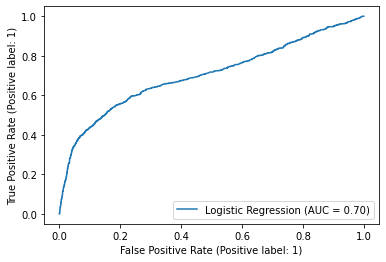

In [54]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_reg, X_test, y_test, name = 'Logistic Regression')

## Random Forest

In [55]:
df_X = card_data.drop(['default'], axis=1)
df_y = card_data.default
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)
# Using only the selected features
X_train = X_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]
X_test = X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]

In [56]:
# Getting the test and train accuracy
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(random_forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(random_forest.score(X_test, y_test)))

Accuracy on training set: 0.817
Accuracy on test set: 0.816


In [57]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.80875,0.699219,0.206459,0.318789,0.590941


### Cross Validate

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.811875 0.810625 0.815    0.811875 0.81375  0.816875 0.811875 0.818125
 0.82625  0.804375]


### Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[3056,   77],
       [ 688,  179]], dtype=int64)

### Grid Search

In [400]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=random_forest,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.806625


In [403]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2
y_pred_rf = grid_search_rf.predict(X_test)
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.80975,0.670968,0.239908,0.353441,0.603676
1,Random Forest Tuned,0.81125,0.693103,0.231834,0.347450,0.601713


### ROC Curve

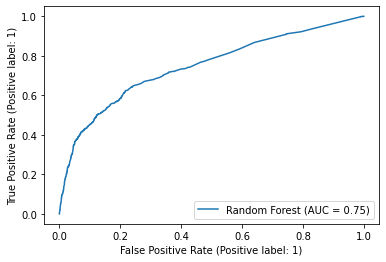

In [60]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(random_forest, X_test, y_test, name = 'Random Forest')

## KNN

In [61]:
df_X = card_data.drop(['default'], axis=1)
df_y = card_data.default

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

# Using only the selected features
X_train = X_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]
X_test = X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]

In [62]:
# Fitting the model
# Getting the test and train accuracy
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.78


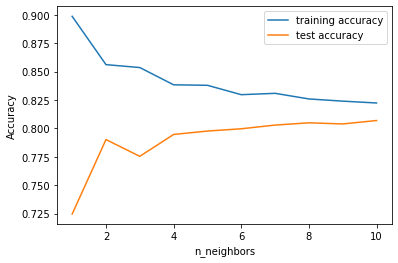

In [63]:
#Getting the test and train accuracy 
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [88]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
y_pred = knn.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.807,0.619048,0.28489,0.390205,0.618187


### Cross Validate

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.80875  0.806875 0.814375 0.8025   0.8025   0.806875 0.79875  0.8
 0.814375 0.799375]


### ROC Curve

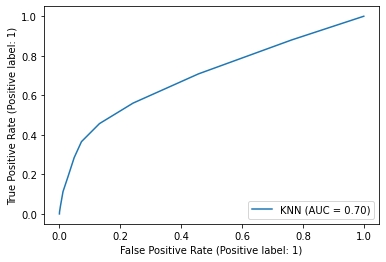

In [66]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knn, X_test, y_test, name = 'KNN')

## Decision Tree

In [67]:
df_X = card_data.drop(['default'], axis=1)
df_y = card_data.default

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

# Using only the selected features
X_train = X_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]
X_test = X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]

In [68]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.928
Accuracy on test set: 0.763


##### To reduce the overfitting

In [69]:
tree_new = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_new.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree_new.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_new.score(X_test, y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.817


In [89]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
y_pred = tree_new.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.817,0.667494,0.310265,0.423622,0.633747


#### Feature Importance

In [72]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.05373497 0.08469195 0.05335762 0.29864087 0.23625658 0.07263126
 0.04454714 0.05338989 0.05235654 0.05039318]


### Cross Validate

In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_new, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81875  0.8175   0.820625 0.81625  0.81     0.82125  0.816875 0.82125
 0.826875 0.81125 ]


### ROC Curve

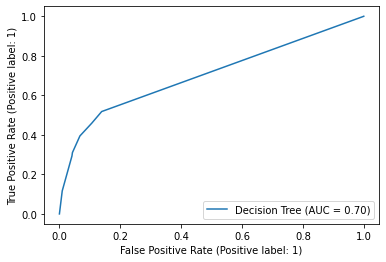

In [74]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(tree_new, X_test, y_test, name = 'Decision Tree')

## Gradient Boosting

In [75]:
df_X = card_data.drop(['default'], axis=1)
df_y = card_data.default

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

# Using only the selected features
X_train = X_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]
X_test = X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']]

#### Normal Algorithm Run

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gb.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gb.score(X_test, y_test)))

Accuracy on training set: 0.822
Accuracy on test set: 0.820


#### Try chaging the learning Rate

In [77]:
gb2 = GradientBoostingClassifier(learning_rate=0.001,random_state=42)
gb2.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gb2.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.778
Accuracy on test set: 0.783


In [92]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
y_pred = gb.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.82025,0.665179,0.343714,0.453232,0.647918


### Cross Validate

In [93]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb2, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.77875  0.77875  0.77875  0.778125 0.778125 0.778125 0.778125 0.778125
 0.778125 0.778125]


### Feature Importance

In [95]:
print('Feature importances:\n{}'.format(gb.feature_importances_))

Feature importances:
[0.00209839 0.01609813 0.00832341 0.0231843  0.71620587 0.08017859
 0.05795614 0.02990672 0.02413137 0.04191707]


### ROC Curve

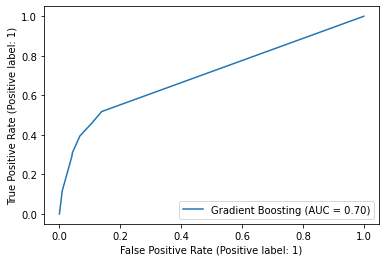

In [96]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gb2, X_test, y_test, name = 'Gradient Boosting')

### Comparing the Algorithm Performance

In [87]:
algorithms = ['KNN','Logistic Regression', 'Decision Trees', 'Random Forest',
 'Gradient Boosting']
tests_accuracies = [knn.score(X_test, y_test), log_reg.score(X_test, y_test), tree_new.score(X_test, y_test),
 random_forest.score(X_test, y_test), gb.score(X_test, y_test)]
all_algorithms = pd.DataFrame({ 'Algorithms': algorithms, 'Tests Accuracy': tests_accuracies })
all_algorithms.sort_values(by = 'Tests Accuracy', ascending = False)

,Algorithms,Tests Accuracy
4,Gradient Boosting,0.82025
2,Decision Trees,0.81700
3,Random Forest,0.81600
1,Logistic Regression,0.80875
0,KNN,0.80700
